In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [4]:
df = pd.read_pickle('../data/interim/processed_data.pkl')
df.head()


,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
epoch (ms),,,,,,,,,,
2019-01-11 15:08:05.200,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
2019-01-11 15:08:05.400,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2019-01-11 15:08:05.600,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
2019-01-11 15:08:05.800,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
2019-01-11 15:08:06.000,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64


In [5]:
df.reset_index(drop=True, inplace=True)
df.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,bench,heavy,64
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,bench,heavy,64
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,bench,heavy,64
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,bench,heavy,64
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,bench,heavy,64


In [6]:
features = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'participant', 'category', 'set']

X = df[features]
X.head()

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,category,set
0,0.013500,0.977000,-0.071000,-1.8904,2.4392,0.9388,B,heavy,64
1,-0.001500,0.970500,-0.079500,-1.6826,-0.8904,2.1708,B,heavy,64
2,0.001333,0.971667,-0.064333,2.5608,-0.2560,-1.4146,B,heavy,64
3,-0.024000,0.957000,-0.073500,8.0610,-4.5244,-2.0730,B,heavy,64
4,-0.028000,0.957667,-0.115000,2.4390,-1.5486,-3.6098,B,heavy,64


In [7]:
label = ['label']
Y = df[label]
Y.head()

,label
0,bench
1,bench
2,bench
3,bench
4,bench


In [8]:
X = pd.get_dummies(X)

In [9]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, Y_train)



DecisionTreeClassifier()

In [11]:
y_pred = dt_clf.predict(X_test)


In [12]:
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9833518312985572

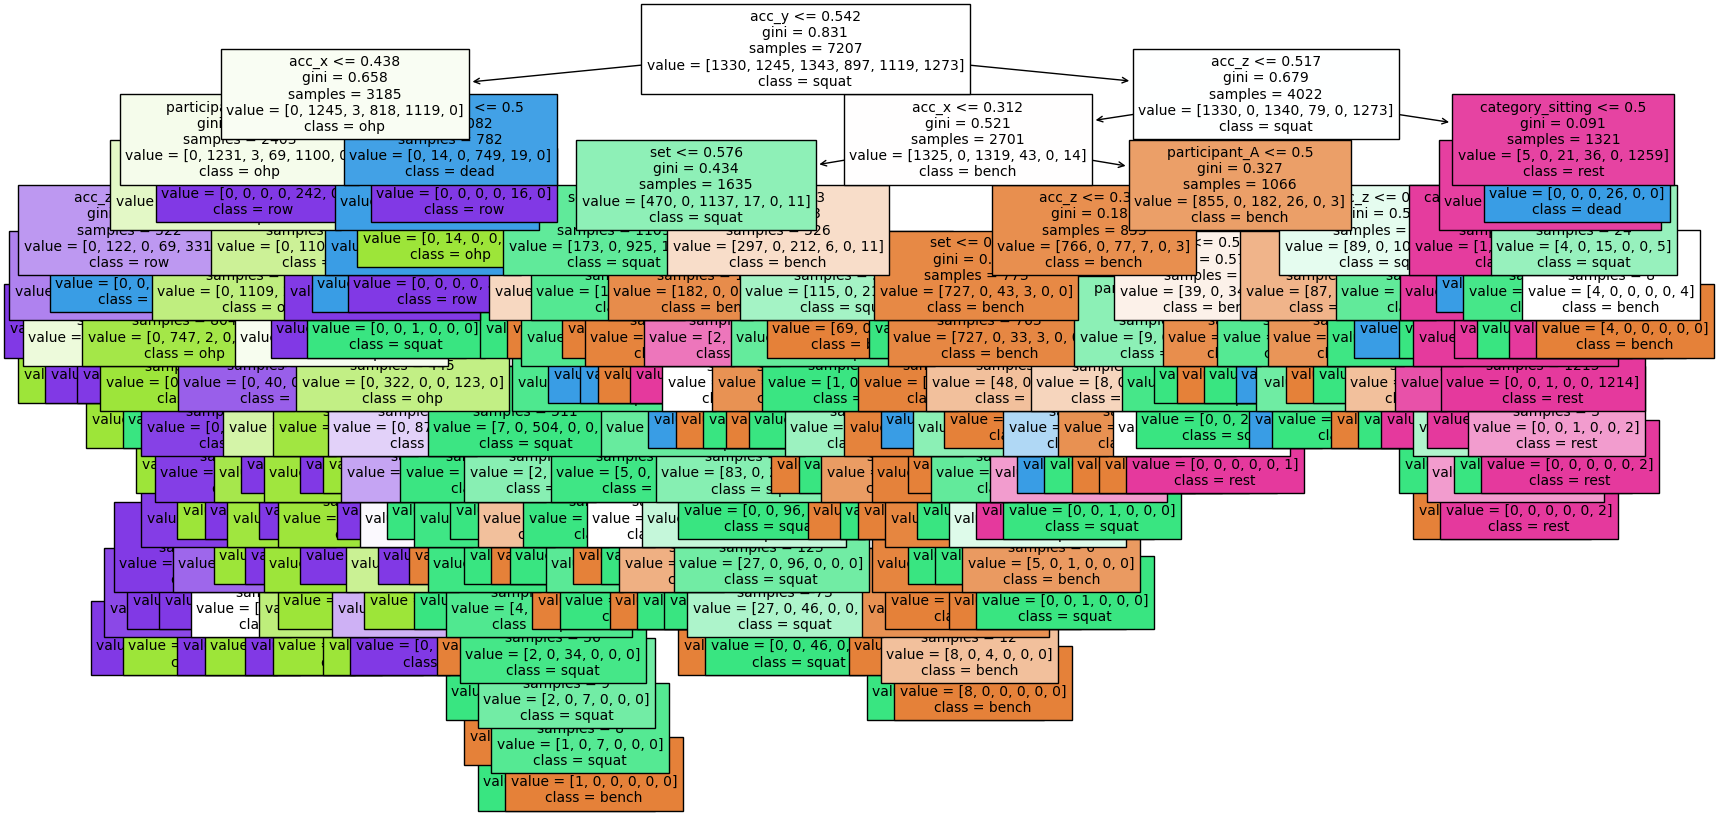

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=df['label'].unique(), fontsize=10)
plt.show()

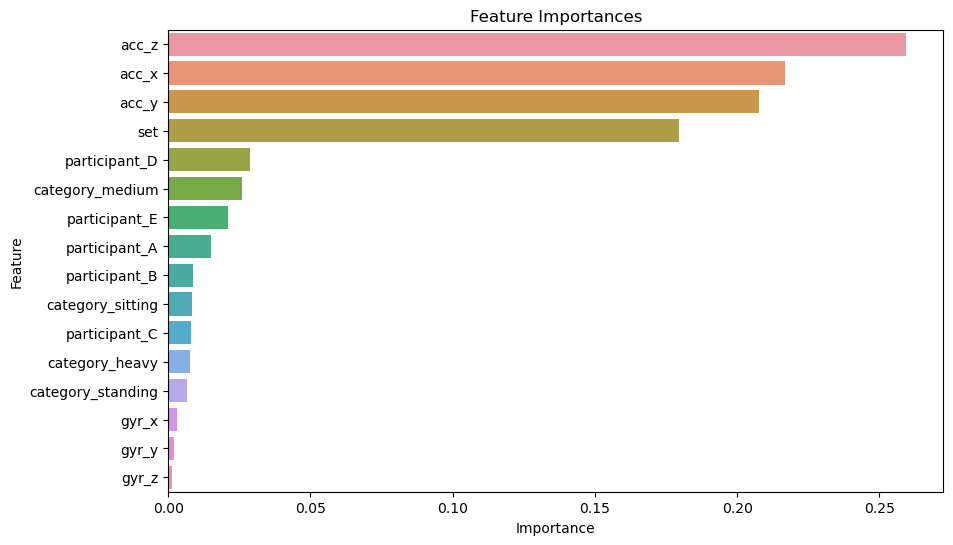

In [16]:
import seaborn as sns

feature_importances = dt_clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


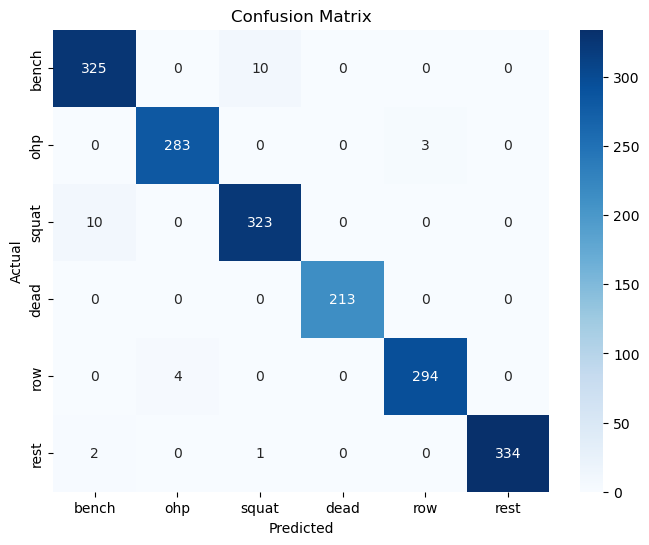

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=df['label'].unique(), yticklabels=df['label'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [16]:
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(Y_train)

trained_data = pd.concat([X_train_df, y_train_df], axis=1)

trained_data.to_csv('../data/interim/trained_data_dt.csv')
